# Questions
1-What is the movie to show ratio

2- what is the most productive country

3-what is the most produced genre

4-what is the most produced age certification

4-does the movie making buisness increase every year

6-what is the average imdb score for every age certification

In [36]:
# importin necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import operator
import itertools

df1=pd.read_csv(r'Titles.csv')
df1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


# Data wrangling
1- dropping unnecessary columns

2- handling missing values

3-fixing string in both productioncountries and genre

In [37]:
#Dropping unnecessary columns
df1.drop(columns=['description','tmdb_popularity','tmdb_score','imdb_id'],inplace=True)
df1.columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score',
       'imdb_votes'],
      dtype='object')

In [38]:
#know how many nulls in the data
df1.isnull().sum()

id                         0
title                      1
type                       0
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_score               482
imdb_votes               498
dtype: int64

In [39]:
#Dealing with columns
df1['age_certification'].fillna('Unknown',inplace=True)
# df1['title'].dropna(inplace=True)
df1['seasons'].fillna(0,inplace=True)
df1['imdb_score'].fillna(5,inplace=True)
df1['imdb_votes'].fillna(0,inplace=True)

In [40]:
#Dealing the rest of nulls 
df1.dropna(inplace=True)
df1.isnull().sum()


id                      0
title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
dtype: int64

In [41]:
#fixing strings in genres and production_countries
x='genres'
def cleaning(x):
    df1[x]=df1[x].str.replace('\[\'','',regex=True)
    df1[x]=df1[x].str.replace('\'\]','',regex=True)
    df1[x]=df1[x].str.replace('\'','',regex=True)
    df1[x]=df1[x].str.replace(' ','',regex=True)
cleaning(x)
x='production_countries'
cleaning(x)




In [42]:
def cleaning_some_columns(column) :
    # converting series to list 
    llist=list(column)
    full_units_of_the_column=[]
    ddi={}
    # splitting rows with the | separator to multiple rows and adding everting to a list
    for i in range(len(llist)):
        if ',' in column[i]:
            for c in column[i].split(','):
                full_units_of_the_column.append(c)
        else:
            full_units_of_the_column.append(column[i])
    # converting to a set and adding everyrhing to a dictionary to ease making charts        
    for i in list(set(full_units_of_the_column)):
        ddi[i]=full_units_of_the_column.count(i)
    ddi=dict(sorted(ddi.items(),key=operator.itemgetter(1),reverse=True))    
    return ddi

# data analyzing

Text(0.5, 1.0, 'movies & show count')

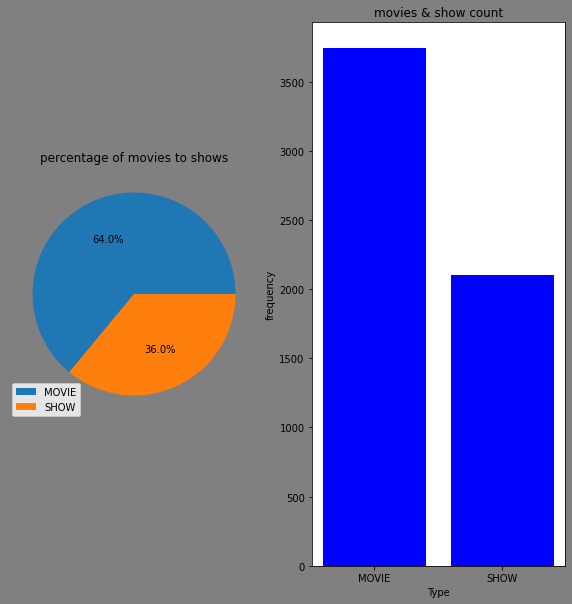

In [43]:
# movies to show ration and count

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
fig.patch.set_facecolor('grey')
axes[0].pie(df1['type'].value_counts() ,autopct='%1.1f%%')
axes[0].set_title('percentage of movies to shows',loc='center')
axes[0].legend(labels=df1['type'].value_counts().index ,fontsize=10,loc='lower left')

axes[1].bar(df1['type'].value_counts().index,df1['type'].value_counts(),color='blue')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('frequency')
axes[1].set_title('movies & show count')

We can see that movies are made more than movies 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

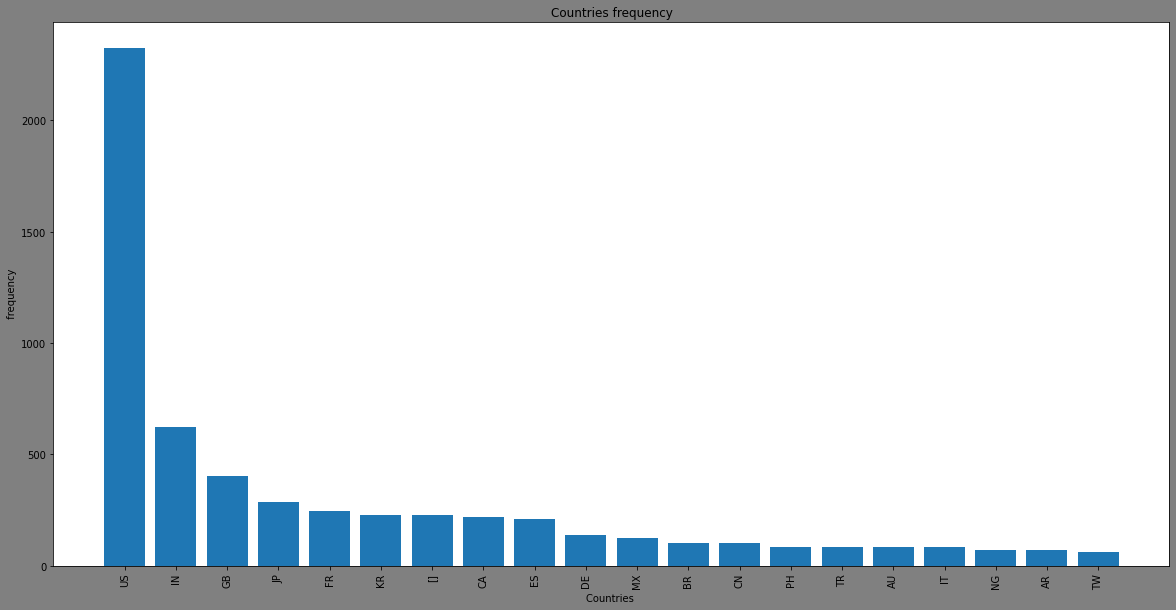

In [44]:
#getting unique values of the production countries
prod=list(df1['production_countries'])
production_countries=cleaning_some_columns(prod)
#geting only the first 19 result
res = dict(itertools.islice(production_countries.items(),0,20))

#analyzing
fig,axes=plt.subplots(figsize=(20,10))    
fig.patch.set_facecolor('grey')
axes.bar(res.keys(),res.values())
axes.set_title('Countries frequency')
axes.set_xlabel('Countries ')
axes.set_ylabel(' frequency')
plt.xticks(rotation ='vertical')

we can see that USA is the most productive country

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

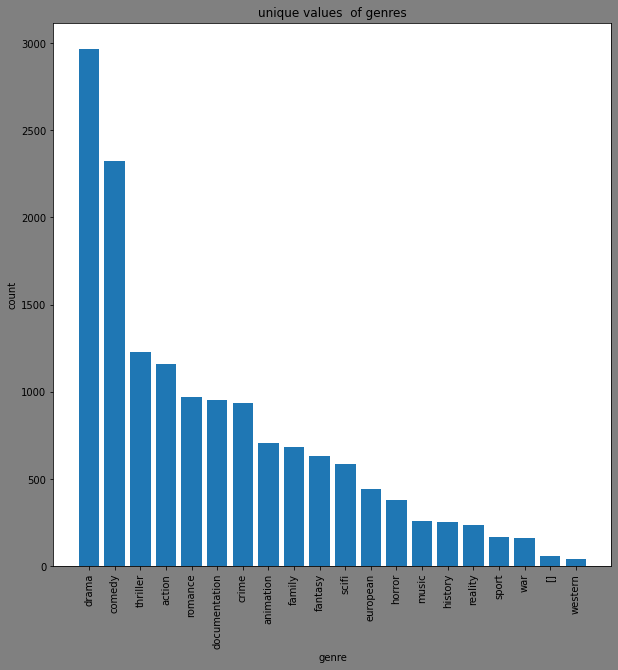

In [45]:
#getting unique values of the genres
#getting the column cleaned
genre=list(df1['genres'])
genre_cont=cleaning_some_columns(genre)
#analyzing
explode=[0. ,0.2 ,0. ,0.2 ,0. ,0.2 ,0. ,0.2 ,0. ,0.2 ,0. ,0.2 ,0. ,0.2,0. ,0. ,0.2 ,0. ,0.2 ,0.]
fig,axes=plt.subplots(figsize=(10,10))   
fig.patch.set_facecolor('grey')
axes.bar(genre_cont.keys(),genre_cont.values())
axes.set_title('unique values  of genres')
axes.set_xlabel('genre')
axes.set_ylabel('count')
plt.xticks(rotation ='vertical')
    


We can see that drama is the most used genre

In [46]:
df1.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,documentation,US,1.0,5.0,0.0
1,tm84618,Taxi Driver,MOVIE,1976,R,114,"drama,crime",US,0.0,8.2,808582.0
2,tm154986,Deliverance,MOVIE,1972,R,109,"drama,action,thriller,european",US,0.0,7.7,107673.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"fantasy,action,comedy",GB,0.0,8.2,534486.0
4,tm120801,The Dirty Dozen,MOVIE,1967,Unknown,150,"war,action","GB,US",0.0,7.7,72662.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

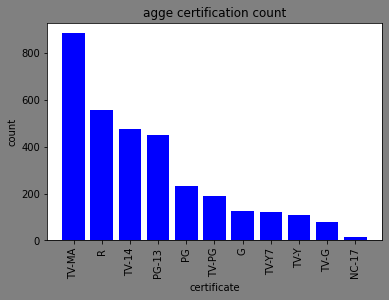

In [47]:
#as there are about 2500 production without specified genre
fig,axes=plt.subplots()
fig.patch.set_facecolor('grey')
ss=df1.loc[df1['age_certification'] != 'Unknown']
axes.bar(ss['age_certification'].value_counts().index,ss['age_certification'].value_counts(),color='b')

axes.set_ylabel('count')
axes.set_title('agge certification count')
axes.set_xlabel('certificate')
plt.xticks(rotation ='vertical')

WE can see that TV-MA is the most produced certificate for movies

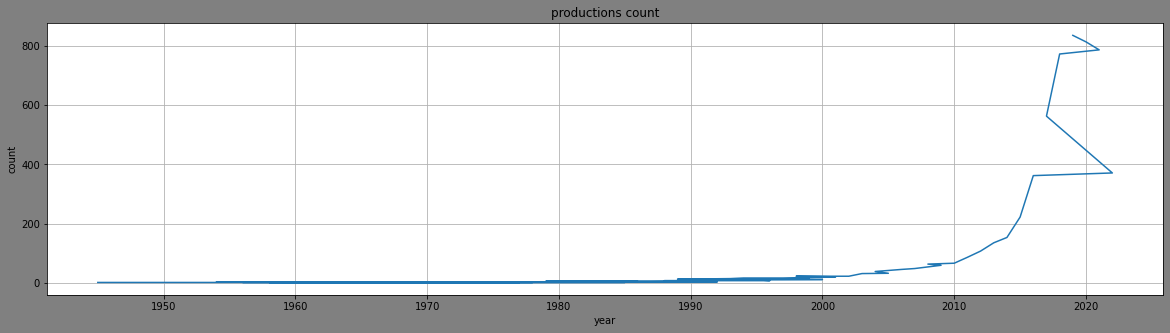

In [48]:
#the count of movies by year
df1['release_year'].value_counts()

fig,axes=plt.subplots(figsize=(20,5))
fig.patch.set_facecolor('grey')
axes.plot(df1['release_year'].value_counts().index,df1['release_year'].value_counts())
axes.set_title('productions count')
axes.set_xlabel('year')
axes.set_ylabel('count')
axes.grid(True)

We can see that movie making is increasing by the year .and 2010  was the yaer of the count explosion

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

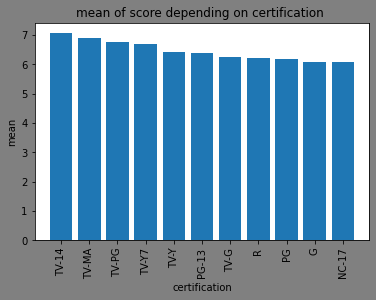

In [49]:
# the imdb average  score by age certification

imdb_score = ss.groupby('age_certification')[['imdb_score']].mean().reset_index()
imdb_score=imdb_score.sort_values(by='imdb_score',ascending=False)
fig,axes=plt.subplots()
fig.patch.set_facecolor('grey')
axes.bar(imdb_score['age_certification'],imdb_score['imdb_score'])
axes.set_title('mean of score depending on certification ')
axes.set_xlabel('certification')
axes.set_ylabel('mean')
plt.xticks(rotation=90)


We can see that TV-14 has the highest imdb average score

# Conclusion
we now know that TV-14 has the highest average score , drama is the most used genre in movies  , USA produces movies the most  ,and the movie making business skroceted since 2010 

## Limitations
1- the data doesn't represent the whole world only the movies in the website data base